In [1]:
import scanpy as sc
import scvi
from matplotlib import rcParams
import matplotlib.pyplot as plt

folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/concat/"

# Load data

In [2]:
# Read in the data
adata = sc.read(folder_path + "adata_scVI.h5ad")
model = scvi.model.SCVI.load(folder_path + "model/", adata)

INFO     File C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/concat/model/model.pt already        
         downloaded                                                                                                


c:\Users\heung\anaconda3\Lib\site-packages\scvi\data\fields\_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:434: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

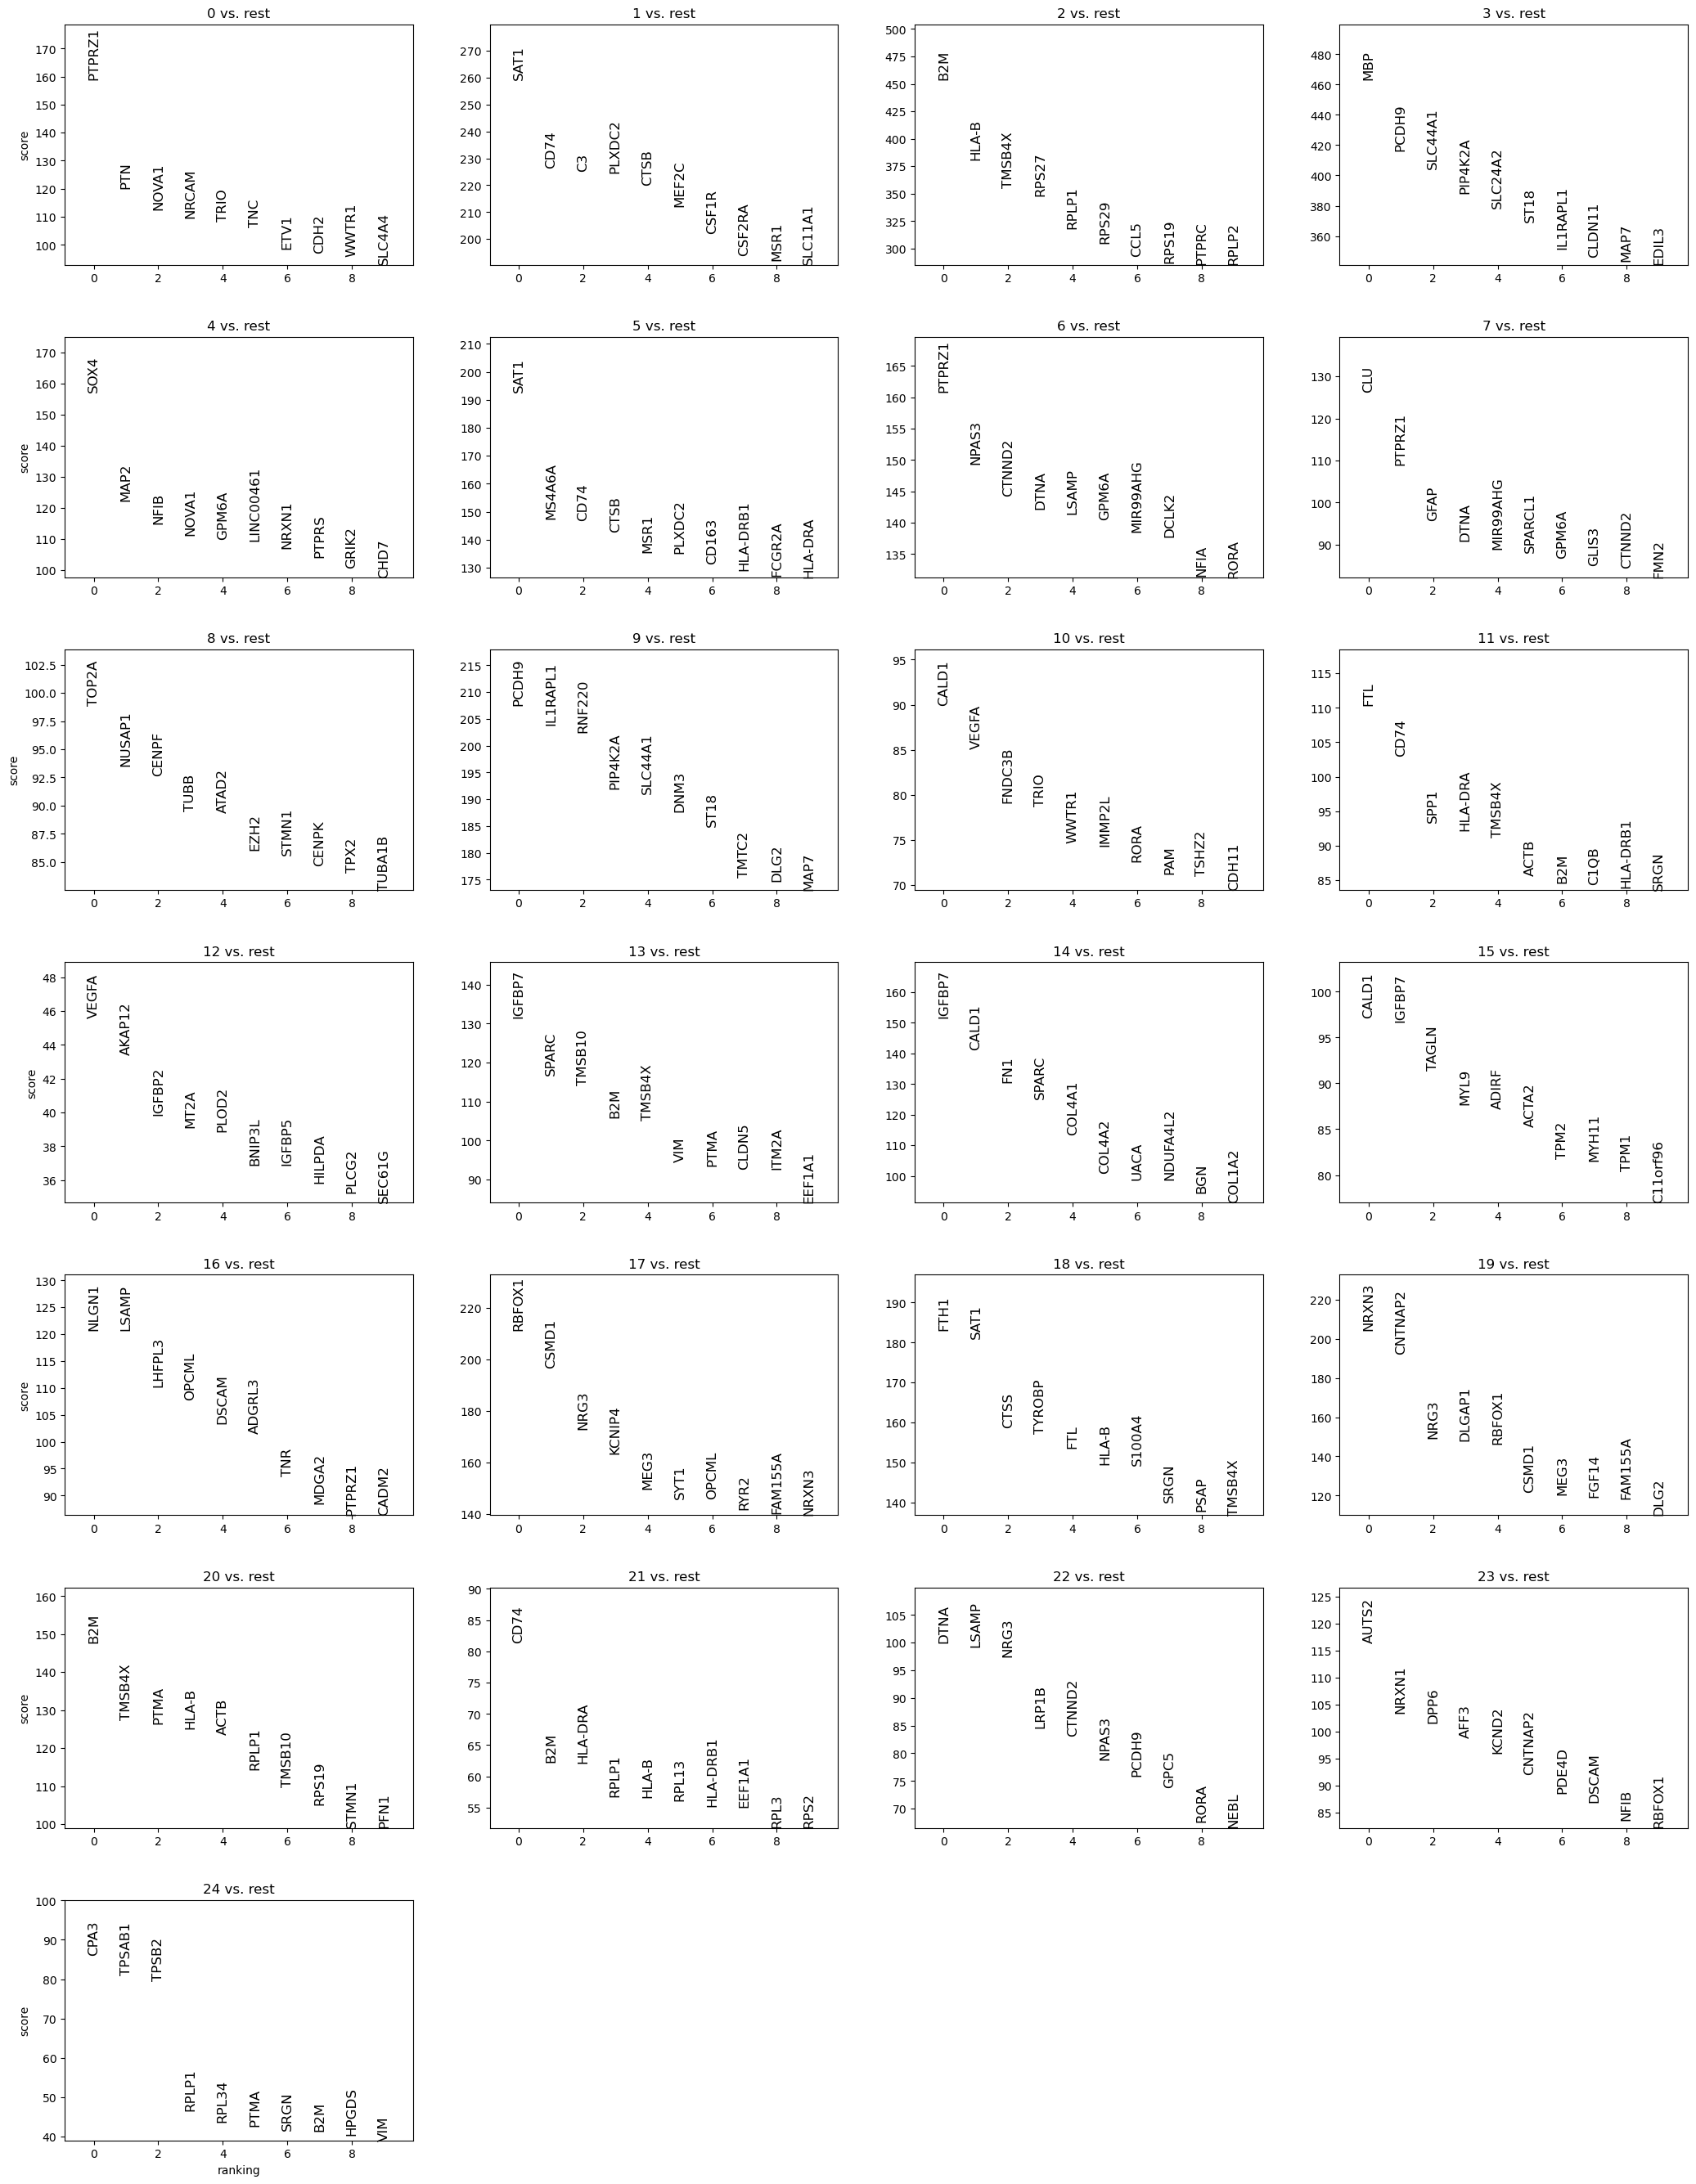

In [3]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes = 10, sharey = False, fontsize = 12)

# run time: 27s
# run time: 39s for adata_harmony.h5ad

# Finding markers

In [4]:
# making markers
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]

In [ ]:
# making markers_scvi
# 18개 cluster DEG 찾는데 약 3분 소요
# 94개 sample 찾는데 1시간 반 걸림 -> 안돌림.
markers_scvi = model.differential_expression(groupby = 'leiden')

# markers_scvi filtering
# FDR < 0.05 and logFC > 0.5
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

FDR (false discovery rate)\
FDR < 0.005 :위양성의 비율이 0.05 미만이다.\
LFC: log fold change

# Visualizing UMAP cluster

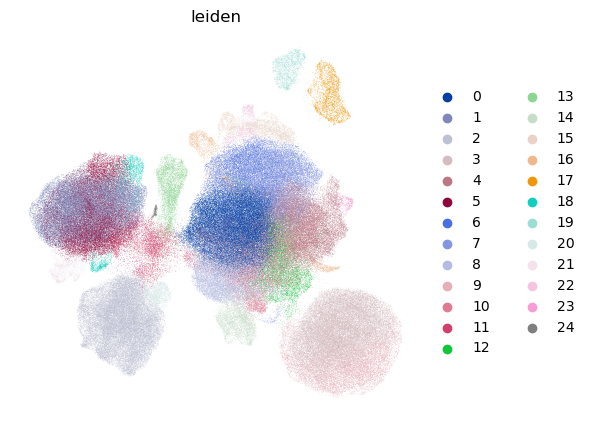

In [5]:
rcParams['figure.figsize'] = (5.3, 5)

sc.pl.umap(
    adata,
    color = ['leiden'],
    frameon = False,
    # legend_loc = 'on data'
)

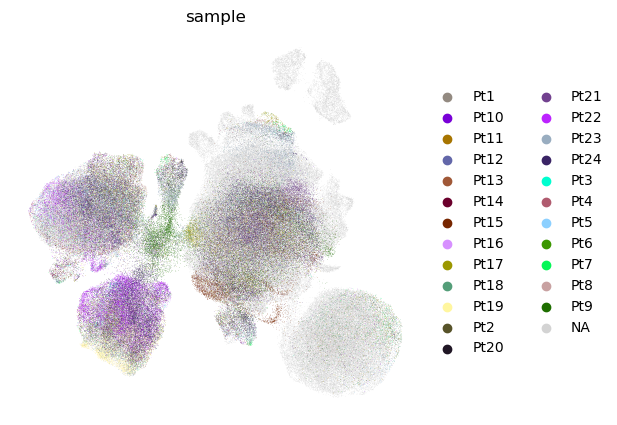

In [6]:
rcParams['figure.figsize'] = (5.3, 5)

sc.pl.umap(
    adata,
    color = ['sample'],
    frameon = False,
    # legend_loc = 'on data',
    groups = ['Pt1', 'Pt2', 'Pt3', 'Pt4', 'Pt5', 'Pt6', 'Pt7', 'Pt8', 'Pt9', 'Pt10', 'Pt11', 'Pt12', 'Pt13', 'Pt14', 'Pt15', 'Pt16', 'Pt17', 'Pt18', 'Pt19', 'Pt20', 'Pt21', 'Pt22', 'Pt23', 'Pt24']
)

# Cell type annotation

In [8]:
for i in range(25):
    print(f'"{i}": "", ')

"0": "", 
"1": "", 
"2": "", 
"3": "", 
"4": "", 
"5": "", 
"6": "", 
"7": "", 
"8": "", 
"9": "", 
"10": "", 
"11": "", 
"12": "", 
"13": "", 
"14": "", 
"15": "", 
"16": "", 
"17": "", 
"18": "", 
"19": "", 
"20": "", 
"21": "", 
"22": "", 
"23": "", 
"24": "", 


In [8]:
cell_type = {
"0": "tumor", 
"1": "Microglia", 
"2": "T cells", 
"3": "Oligodendrocyte", 
"4": "tumor", 
"5": "Microglia", 
"6": "tumor", 
"7": "tumor", 
"8": "tumor", 
"9": "Oligodendrocyte", 
"10": "tumor", 
"11": "DC", 
"12": "tumor", 
"13": "Endothelial cells", 
"14": "Fibroblasts", 
"15": "Endothelial cells", 
"16": "tumor", 
"17": "Neuron", 
"18": "DC", 
"19": "Neuron", 
"20": "T cells", 
"21": "DC", 
"22": "tumor", 
"23": "tumor", 
"24": "Mast cell", 
}

## Gene expression in feature plot

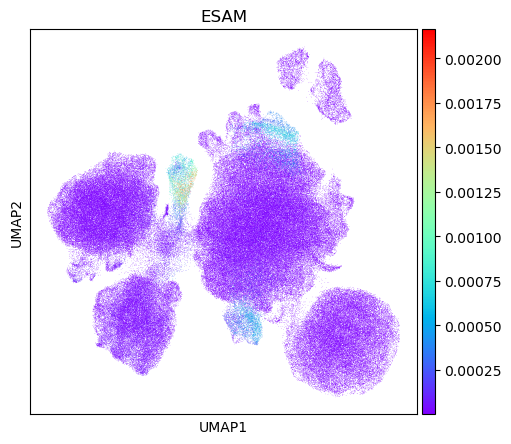

In [7]:
rcParams['figure.figsize'] = (5.5, 5)

sc.pl.umap(
    adata,
    color = ['ESAM'],
    # frameon = False,
    layer = 'scvi_normalized',
    color_map = 'rainbow',
)

In [82]:
adata.obs.head()

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,tumor_cell,cell_type
AAACCCACAGAGTGAC-1,SF10099,1258,2454.0,0.285249,0.529747,0,0,3,0.016958,normal,Oligodendrocyte
AAAGGATCAATCGCCG-1,SF10099,1968,3911.0,0.000000,0.332396,0,0,3,0.016958,normal,Oligodendrocyte
AAAGGTAAGGATAATC-1,SF10099,2260,4602.0,0.239027,0.173837,0,0,4,0.021842,tumor,tumor
AAAGTGAAGCGGTATG-1,SF10099,1780,3002.0,0.199867,0.699534,0,0,4,0.016087,tumor,tumor
AACAACCTCAGCGTCG-1,SF10099,2587,5590.0,0.751342,0.876565,0,0,3,0.016958,normal,Oligodendrocyte


## Gene expression by violin plot

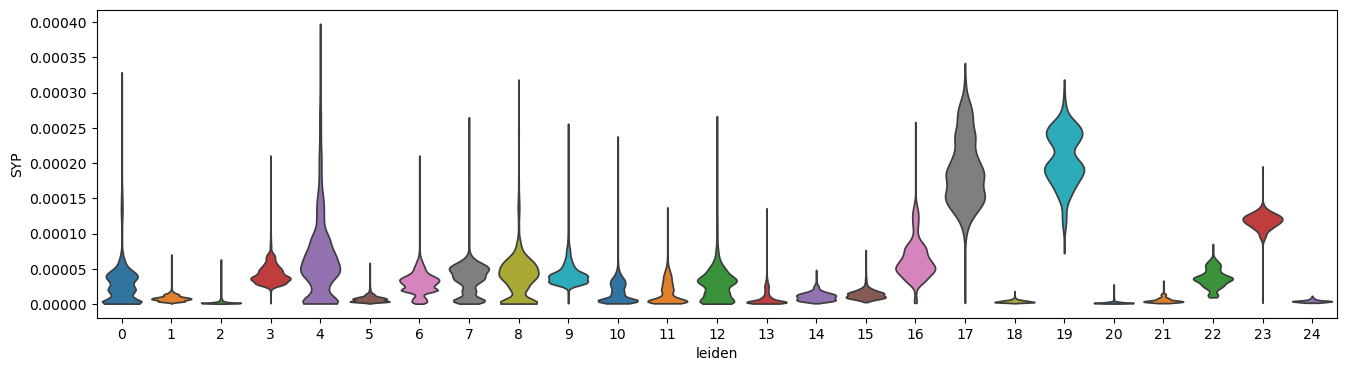

In [83]:
fig, ax = plt.subplots(figsize = (16, 4))

sc.pl.violin(
    adata,
    keys = ['SYP'],
    groupby = 'leiden',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
)

## Search cluster by gene name

In [ ]:
# 유전자를 입력하면 높게 발현하는 cluster를 보여줌
markers[markers.names == 'P2ry12']

## Search genes highly expressed in the cluster

In [ ]:
# cluster를 입력하면 높게 발현하는 유전자를 보여줌
for item in markers_scvi[markers_scvi.group1 == '15'][0:10].index:   # 10 개 까지 보여줌
    print(item)

## Cell type 설정

In [9]:
# Assigning cell types
# adata obs에 cell_type column 추가
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs.head(5)

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,tumor_cell,cell_type
AAACCCACAGAGTGAC-1,SF10099,1258,2454.0,0.285249,0.529747,0,0,3,0.016958,normal,Oligodendrocyte
AAAGGATCAATCGCCG-1,SF10099,1968,3911.0,0.000000,0.332396,0,0,3,0.016958,normal,Oligodendrocyte
AAAGGTAAGGATAATC-1,SF10099,2260,4602.0,0.239027,0.173837,0,0,4,0.021842,tumor,tumor
AAAGTGAAGCGGTATG-1,SF10099,1780,3002.0,0.199867,0.699534,0,0,4,0.016087,tumor,tumor
AACAACCTCAGCGTCG-1,SF10099,2587,5590.0,0.751342,0.876565,0,0,3,0.016958,normal,Oligodendrocyte


## Cell type 확인

### UMAP 확인

In [16]:
adata

AnnData object with n_obs × n_vars = 276625 × 34223
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'cnv_score', 'tumor_cell', 'cell_type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [36]:
colors = ['#e3342f', '#f6993f', '#ffed4a', '#38c172', '#4dc0b5', '#3490dc', '#6574cd', '#9561e2', '#f66d9b']
colors = colors[::-1]
adata.uns['cell_type_colors'] = colors

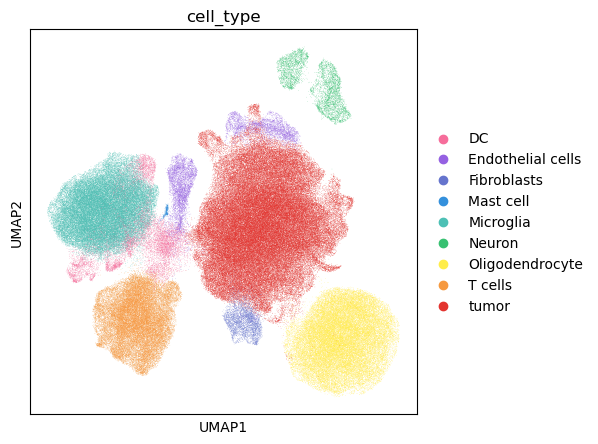

In [37]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['cell_type'],
    # frameon = False,
    # legend_loc = 'on data',
    # palette = sc.pl.palettes.vega_10
    # palette = 'rainbow'
)

### Violin plot gene expression 확인

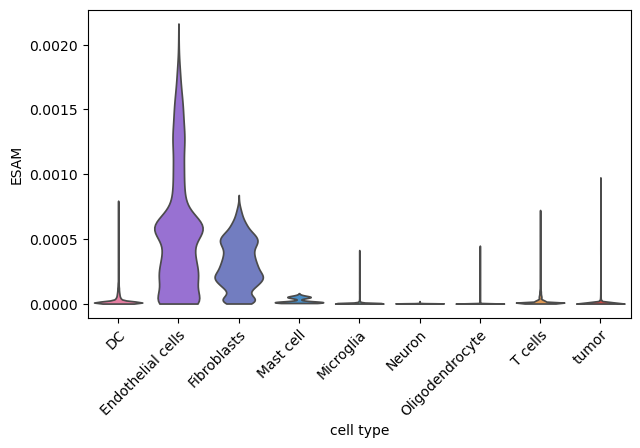

In [63]:
fig, ax = plt.subplots(figsize = (7, 4))

sc.pl.violin(
    adata,
    keys = ['ESAM'],
    groupby = 'cell_type',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
    show = False
)

plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')   # x 축 레이블 회전
plt.show()

### Dot plot

In [59]:
marker_genes_dict = {
    'DC': ['ITGAX'],
    'Endothelias': ['ESAM'],
    'Fibroblast': ['FN1'],
    'Mast cell': ['CPA3'],
    'Microglia': ['P2RY12', 'TMEM119'],
    'Neuron': ['MYT1L', 'SNAP25', 'SYP'],
    'Oligodendrocyte': ['MBP', 'MAG', 'OLIG2'],
    'T cells': ['CD3E'],
    'tumor': ['EGFR'],
}

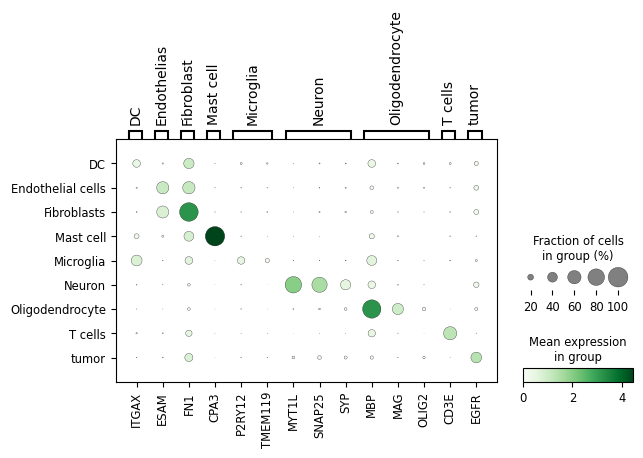

In [62]:
# sc.tl.dendrogram(adata, groupby = 'cell_type')    # dot plot 한번 그린 후 cell type annotation 바꾸면 이거 돌려줘야 함

sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby = 'cell_type',
    # dendrogram = True,
    # var_group_rotation = 45,
    cmap = 'Greens',
)

In [ ]:
adata

# Save

In [64]:
# adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

adata.write_h5ad(folder_path + "adata_annotated.h5ad")
# 3,446,216 kb